In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from metadPy.sdt import rates, dprime, criterion
from metadPy.utils import trials2counts, discreteRatings
from scipy.stats import norm
import seaborn as sns
import numpy as np
import pingouin as pg
from systole.detection import oxi_peaks, rr_artefacts

sns.set_context('paper')

Import summary statistics from behavioral data

In [2]:
path = os.path.abspath(os.path.join(os.getcwd(), os.pardir))
group_df = pd.read_csv(path + '/data/behavior.txt')
group_df = group_df[group_df.Session == 'Del1']

# Correlation with HBC

C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\histograms.py:905: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges


(0.1, 1.5)

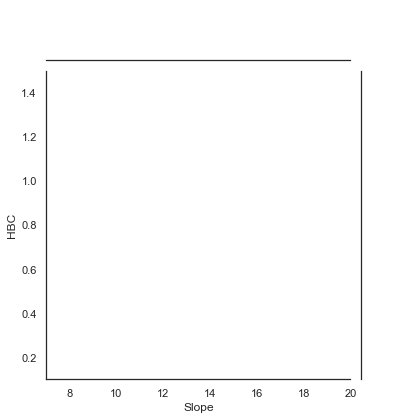

In [19]:
sns.set(style="white", color_codes=True)
sns.jointplot(data=group_df[group_df.Modality=='Intero'], x='Slope', y='HBC', kind="reg")
plt.xlim(7, 20)
plt.ylim(.1, 1.5)

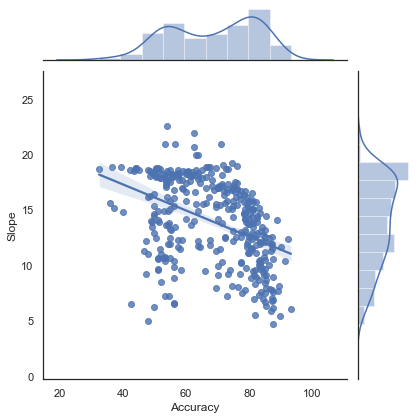

In [20]:
sns.set(style="white", color_codes=True)
sns.jointplot(data=group_df[group_df.Modality=='Intero'], x='Accuracy', y='Slope', kind="reg")

In [49]:
pg.corr(x=group_df[group_df.Modality=='Intero'].Threshold,
        y=group_df[group_df.Modality=='Intero'].HBC, method='skipped')

,n,r,CI95%,r2,adj_r2,p-val,power
spearman,198,-0.252613,"[-0.38, -0.12]",0.063813,0.054211,0.00033,0.950925


# Test-retest reliability

In [22]:
group_df = pd.read_csv('behavior.txt')

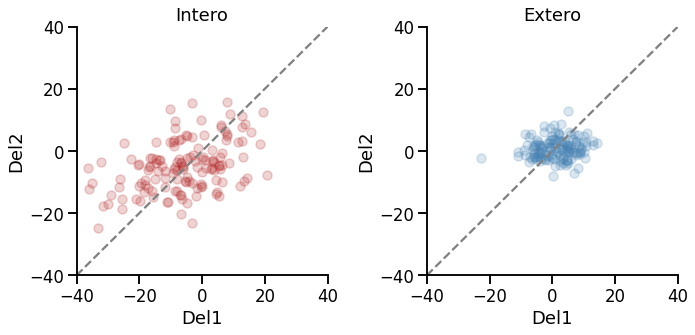

In [18]:
sns.set_context('talk')
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
for i, modality, color in zip([0, 1], ['Intero', 'Extero'], ['firebrick', 'steelblue']):
    for sub in group_df[group_df.Session == 'Del2'].Subject.unique():
        try:
            x=group_df[(group_df.Session == 'Del1') & (group_df.Subject == sub) & (group_df.Modality == modality)].Threshold.iloc[0]
            y=group_df[(group_df.Session == 'Del2') & (group_df.Subject == sub) & (group_df.Modality == modality)].Threshold.iloc[0]
            axs[i].scatter(x, y, alpha=.2, color=color)
        except:
            pass
    axs[i].plot([-40, 40], [-40, 40], 'grey', linestyle='--')
    axs[i].set_xlim(-40, 40)
    axs[i].set_ylim(-40, 40)
    axs[i].set_xlabel('Del1')
    axs[i].set_ylabel('Del2')
    axs[i].set_title(modality)
sns.despine()
plt.tight_layout()
plt.savefig('testretest.png', dpi=600)

In [17]:
x, y = [], []
for sub in group_df[group_df.Session == 'Del2'].Subject.unique():
    try:
        x.append(np.abs(group_df[(group_df.Session == 'Del1') & (group_df.Subject == sub) & (group_df.Modality == 'Intero')].Threshold.iloc[0]))
        y.append(np.abs(group_df[(group_df.Session == 'Del2') & (group_df.Subject == sub) & (group_df.Modality == 'Intero')].Threshold.iloc[0]))
    except:
        pass
pg.corr(x, y)

,n,r,CI95%,r2,adj_r2,p-val,BF10,power
pearson,140,0.249539,"[0.09, 0.4]",0.06227,0.04858,0.002946,8.39,0.849279
